In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("../I15S_data2.csv")

In [2]:
df = df[['Date','Time','index','TotalFlow']]
df=df.sort_values(['Date','Time','index'])
data = df.as_matrix()

In [3]:
rows, row_pos = np.unique(data[:, 1], return_inverse=True) #Time
cols, col_pos = np.unique(data[:, 2], return_inverse=True)
depth, depth_pos = np.unique(data[:, 0], return_inverse=True) 

pivot_table = np.zeros((len(rows), len(cols), len(depth)), dtype=data.dtype)
pivot_table[row_pos, col_pos, depth_pos] = data[:, 3]

In [4]:
a = pivot_table; # example of what real input will look like

# create 2D flattened version of 3D input array
d1,d2,d3 = a.shape
b = np.zeros([d1,d2*d3])
for i in range(len(a)):
    b[i] = a[i].flatten()

In [5]:
b.shape # this is 288 dimesions!  yay

(288, 24455)

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans()
my_fit = kmeans.fit(b.transpose())

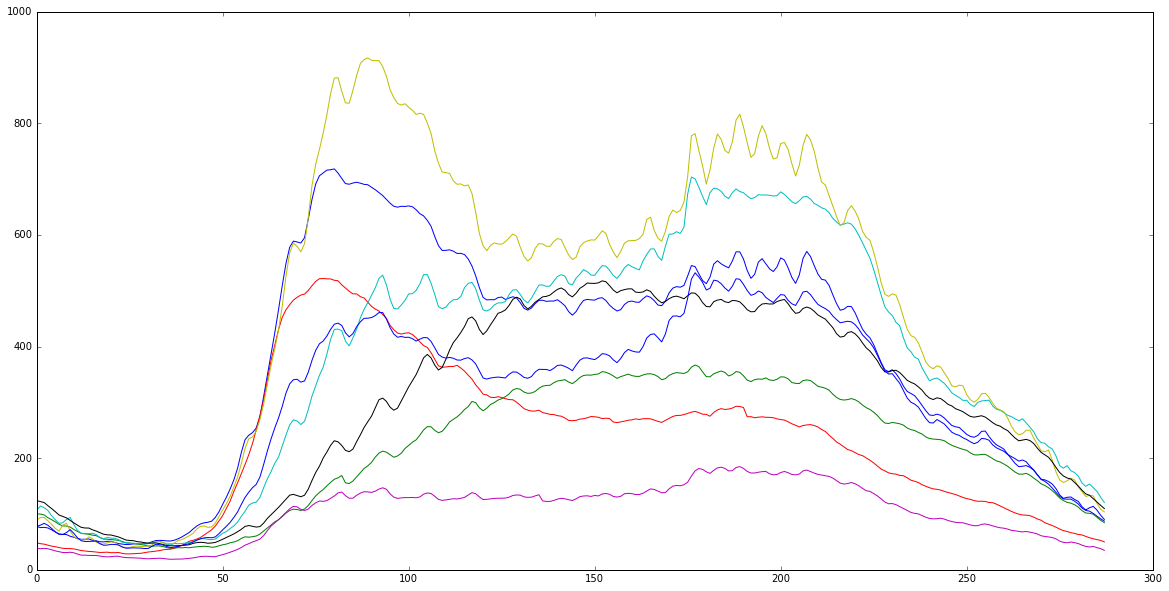

In [7]:
plt.figure(figsize = (20,10))
plt.plot(my_fit.cluster_centers_.transpose())
plt.show() # these are the centers

In [8]:
my_fit = kmeans.fit_predict(b.transpose()) #fit and predict
my_df = pd.DataFrame(b.transpose())
my_df['Cluster'] = my_fit
my_df = my_df.reset_index()
my_df.columns[1:-1]
my_df = my_df.rename(columns = {'index':'station'})
df_unpiv = pd.melt(my_df, id_vars=['station','Cluster'], value_vars=list(my_df.columns[1:-1]))
df_unpiv.columns = ['station','cluster','time','flow']
df_unpiv.to_csv('cluster_output.csv')